In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [6]:
train_data = pd.read_csv(r"datasets\Credit Card Fraud\fraudTest.csv")
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:

train_data['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [6]:
train_data['job'].value_counts()



Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64

In [7]:
train_data['city'].value_counts()


Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: city, Length: 894, dtype: int64

In [23]:
x_train = train_data[['category','city','job','amt']]
y_train = train_data[['is_fraud']]

In [30]:
x_train

,category,city,job,amt
0,misc_net,Moravian Falls,"Psychologist, counselling",4.97
1,grocery_pos,Orient,Special educational needs teacher,107.23
2,entertainment,Malad City,Nature conservation officer,220.11
3,gas_transport,Boulder,Patent attorney,45.00
4,misc_pos,Doe Hill,Dance movement psychotherapist,41.96
...,...,...,...,...
1296670,entertainment,Hatch,Geoscientist,15.56
1296671,food_dining,Tuscarora,"Production assistant, television",51.70
1296672,food_dining,High Rolls Mountain Park,Naval architect,105.93
1296673,food_dining,Manderson,Volunteer coordinator,74.90


In [31]:
y_train

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
1296670,0
1296671,0
1296672,0
1296673,0


In [32]:
y_train.value_counts()

is_fraud
0           1289169
1              7506
dtype: int64

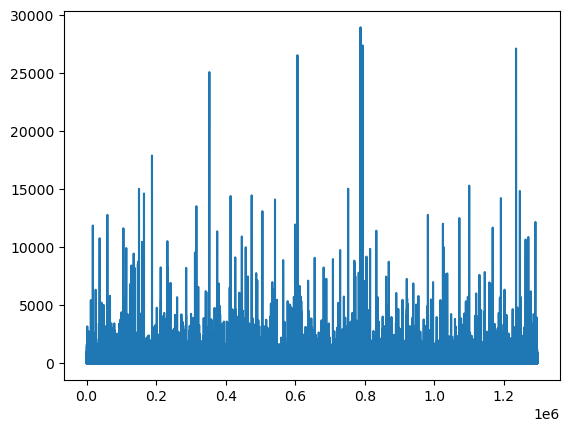

In [33]:
plt.plot(x_train['amt'])

In [15]:
test_data = pd.read_csv(r"datasets\Credit Card Fraud\fraudTest.csv")
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [35]:
x_test = test_data[['category','city','job','amt']]
y_test = test_data['is_fraud']

In [36]:
x_test

,category,city,job,amt
0,personal_care,Columbia,Mechanical engineer,2.86
1,personal_care,Altonah,"Sales professional, IT",29.84
2,health_fitness,Bellmore,"Librarian, public",41.28
3,misc_pos,Titusville,Set designer,60.05
4,travel,Falmouth,Furniture designer,3.19
...,...,...,...,...
555714,health_fitness,Luray,Town planner,43.77
555715,kids_pets,Lake Jackson,Futures trader,111.84
555716,kids_pets,Burbank,Musician,86.88
555717,travel,Mesa,Cartographer,7.99


In [37]:
y_test

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

In [38]:
dtc = DecisionTreeClassifier()

In [39]:
from sklearn.preprocessing import LabelEncoder

# LE = LabelEncoder()

# x_train['category'] = LE.fit_transform(x_train['category'])
# x_train['city'] = LE.transform(x_train['city'])
# x_train['job'] = LE.transform(x_train['job'])
# x_train['amt'] = LE.transform(x_train['amt'])

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['category', 'city', 'job', 'amt']:
    label_encoders[col] = LabelEncoder()
    x_train[col] = label_encoders[col].fit_transform(x_train[col])
    x_test[col] = label_encoders[col].fit_transform(x_test[col])

C:\Users\kuldeep\AppData\Local\Temp\ipykernel_8580\3453223453.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = label_encoders[col].fit_transform(x_train[col])
C:\Users\kuldeep\AppData\Local\Temp\ipykernel_8580\3453223453.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = label_encoders[col].fit_transform(x_test[col])
C:\Users\kuldeep\AppData\Local\Temp\ipykernel_8580\3453223453.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [40]:
x_train

,category,city,job,amt
0,8,526,370,397
1,4,612,428,10623
2,0,468,307,21906
3,2,84,328,4400
4,9,216,116,4096
...,...,...,...,...
1296670,0,330,215,1456
1296671,1,813,360,5070
1296672,1,346,308,10493
1296673,1,471,485,7390


In [41]:
x_test

,category,city,job,amt
0,10,157,275,186
1,10,16,392,2884
2,5,61,259,4028
3,9,764,407,5905
4,13,247,196,219
...,...,...,...,...
555714,5,443,460,4277
555715,7,401,198,11084
555716,7,104,294,8588
555717,13,476,58,699


In [43]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train_scale = ss.fit_transform(x_train)
x_train_scale


array([[ 0.45285278,  0.31220693,  0.848099  , -0.79063948],
       [-0.56926552,  0.64476684,  1.26206149,  0.58774509],
       [-1.59138383,  0.08792233,  0.39845009,  2.10860496],
       ...,
       [-1.33585425, -0.38384871,  0.40558738,  0.57022211],
       [-1.33585425,  0.09952326,  1.6688867 ,  0.15196205],
       [-1.33585425,  1.30215272,  1.54041558, -0.79967056]])

In [44]:
x_test_scale = ss.transform(x_test)
x_test_scale

array([[ 0.96391193, -1.11470713,  0.17005699, -0.81908063],
       [ 0.96391193, -1.65995071,  1.00511926, -0.45541139],
       [-0.31373595, -1.4859368 ,  0.05586045, -0.30120917],
       ...,
       [ 0.1973232 , -1.31965685,  0.3056654 ,  0.31344305],
       [ 1.73050066,  0.11885814, -1.3787337 , -0.74993225],
       [-1.59138383, -0.85561975,  0.17719428, -0.3436687 ]])

In [46]:
model = DecisionTreeClassifier()

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred = model.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9956254869817299

In [50]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

0.004374513018270025